In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from cmapPy.pandasGEXpress.parse import parse
from scipy.stats import hypergeom
from tqdm import tqdm

C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [105]:
df_adrs_sexbias = pd.read_csv("df_drug_adr_p_value_sex-bias_logodd_21_11_23.csv", sep=",")

In [106]:
df_adrs_sexbias

Unnamed: 0     Drug       ADR  Number adrs in Male  \
0              0  DB00398  10061428                  150   
1              0  DB00398  10055798                   14   
2              0  DB00398  10001760                   35   
3              0  DB00398  10018388                    4   
4              0  DB00398  10043942                    2   
...          ...      ...       ...                  ...   
3958           0  DB12332  10010305                    2   
3959           0  DB12332  10061818                    2   
3960           0  DB12332  10066274                    2   
3961           0  DB12332  10043071                    2   
3962           0  DB12332  10076476                   16   

      Number adrs in Female       P-value  \
0                        52  2.832808e-02   
1                        15  4.579148e-02   
2                        47  8.193338e-06   
3                         9  1.362716e-02   
4                         5  4.333231e-02   
...                     ...           ...   
3958                     15  2.164259e-02   
3959                      4  2.632173e-03   
3960                      3  1.770550e-03   
3961                      2  1.071887e-03   
3962                     55  1.237521e-15   

                                            p_value_FDR Significance  \
0     (array([ True]), array([0.02832808]), 0.050000...          Yes   
1     (array([ True]), array([0.04579148]), 0.050000...          Yes   
2     (array([ True]), array([8.19333766e-06]), 0.05...          Yes   
3     (array([ True]), array([0.01362716]), 0.050000...          Yes   
4     (array([ True]), array([0.04333231]), 0.050000...          Yes   
...                                                 ...          ...   
3958  (array([ True]), array([0.02164259]), 0.050000...          Yes   
3959  (array([ True]), array([0.00263217]), 0.050000...          Yes   
3960  (array([ True]), array([0.00177055]), 0.050000...          Yes   
3961  (array([ True]), array([0.00107189]), 0.050000...          Yes   
3962  (array([ True]), array([1.23752125e-15]), 0.05...          Yes   

             Sex-biased  odds_ratio  Log2_Odds_ratio sex_biased_log_oddratio  \
0       sex-biased male    0.699466        -0.515673         sex-biased male   
1     sex-biased female    2.180080         1.124381       sex-biased female   
2     sex-biased female    2.748978         1.458896       sex-biased female   
3     sex-biased female    4.576790         2.194336       sex-biased female   
4     sex-biased female    5.081070         2.345132       sex-biased female   
...                 ...         ...              ...                     ...   
3958  sex-biased female    0.101973        -3.293734         sex-biased male   
3959  sex-biased female    0.027176        -5.201535         sex-biased male   
3960  sex-biased female    0.020381        -5.616655         sex-biased male   
3961      no sex-biased    0.013586        -6.201700         sex-biased male   
3962  sex-biased female    0.044078        -4.503794         sex-biased male   

      Sum_ADRS  
0          202  
1           29  
2           82  
3           13  
4            7  
...        ...  
3958        17  
3959         6  
3960         5  
3961         4  
3962        71  

[3963 rows x 13 columns]

In [16]:
df_adrs_sexbias_top = pd.read_csv("top_5_df_drug_adr_p_value_sex-bias_logodd_21_11_23.csv", sep=",")

In [12]:
df_adrs_sexbias_top

Unnamed: 0     Drug       ADR  Number adrs in Male  \
0             0  DB00014  10011906                   31   
1             0  DB00014  10003549                   10   
2             0  DB00014  10069339                   10   
3             0  DB00014  10016173                    6   
4             0  DB00242  10019211                    6   
..          ...      ...       ...                  ...   
323           0  DB12332  10016256                    7   
324           0  DB12332  10028813                    6   
325           0  DB12332  10047700                    1   
326           0  DB12332  10053762                   18   
327           0  DB12332  10011906                    7   

     Number adrs in Female       P-value  \
0                        7  1.966769e-07   
1                        2  4.820862e-03   
2                        1  7.354531e-04   
3                        1  1.914705e-02   
4                       21  1.386122e-03   
..                     ...           ...   
323                   1258  7.500193e-03   
324                   1199  4.278149e-03   
325                    406  4.768608e-02   
326                    155  2.239106e-11   
327                    121  1.785384e-03   

                                           p_value_FDR Significance  \
0    (array([ True]), array([1.96676873e-07]), 0.05...          Yes   
1    (array([ True]), array([0.00482086]), 0.050000...          Yes   
2    (array([ True]), array([0.00073545]), 0.050000...          Yes   
3    (array([ True]), array([0.01914705]), 0.050000...          Yes   
4    (array([ True]), array([0.00138612]), 0.050000...          Yes   
..                                                 ...          ...   
323  (array([ True]), array([0.00750019]), 0.050000...          Yes   
324  (array([ True]), array([0.00427815]), 0.050000...          Yes   
325  (array([ True]), array([0.04768608]), 0.050000...          Yes   
326  (array([ True]), array([2.23910632e-11]), 0.05...          Yes   
327  (array([ True]), array([0.00178538]), 0.050000...          Yes   

            Sex-biased  odds_ratio  Log2_Odds_ratio sex_biased_log_oddratio  \
0      sex-biased male    0.142942        -2.806501         sex-biased male   
1      sex-biased male    0.132018        -2.921191         sex-biased male   
2      sex-biased male    0.065909        -3.923379         sex-biased male   
3      sex-biased male    0.110859        -3.173208         sex-biased male   
4    sex-biased female    4.086826         2.030981       sex-biased female   
..                 ...         ...              ...                     ...   
323  sex-biased female    2.575594         1.364905       sex-biased female   
324  sex-biased female    2.865832         1.518954       sex-biased female   
325  sex-biased female    5.670657         2.503516       sex-biased female   
326  sex-biased female    0.110060        -3.183632         sex-biased male   
327  sex-biased female    0.231474        -2.111078         sex-biased male   

     Sum_ADRS  
0          38  
1          12  
2          11  
3           7  
4          27  
..        ...  
323      1265  
324      1205  
325       407  
326       173  
327       128  

[328 rows x 13 columns]

In [17]:
network = df_adrs_sexbias_top[["Drug","ADR","sex_biased_log_oddratio","odds_ratio","Sum_ADRS"]]

In [19]:
network["d"]= 1

<ipython-input-19-a07d241b72fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network["d"]= 1


In [20]:
network["a"]= 0

<ipython-input-20-be3ff7fd8cf2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network["a"]= 0


In [36]:
networks = network[network["Drug"] != "DB00665"]
networks
## elimino un caso donde el odd ratio es infinito

Drug       ADR sex_biased_log_oddratio  odds_ratio  Sum_ADRS  d  a
0    DB00014  10011906         sex-biased male    0.142942        38  1  0
1    DB00014  10003549         sex-biased male    0.132018        12  1  0
2    DB00014  10069339         sex-biased male    0.065909        11  1  0
3    DB00014  10016173         sex-biased male    0.110859         7  1  0
4    DB00242  10019211       sex-biased female    4.086826        27  1  0
..       ...       ...                     ...         ...       ... .. ..
323  DB12332  10016256       sex-biased female    2.575594      1265  1  0
324  DB12332  10028813       sex-biased female    2.865832      1205  1  0
325  DB12332  10047700       sex-biased female    5.670657       407  1  0
326  DB12332  10053762         sex-biased male    0.110060       173  1  0
327  DB12332  10011906         sex-biased male    0.231474       128  1  0

[327 rows x 7 columns]

In [23]:
adrs_info = pd.read_csv("adrs_information.txt", sep="\t", dtype=str)

In [63]:
tipo_de_dato = adrs_info['PT'].dtype

In [67]:
adrs_info['PT'] = pd.to_numeric(adrs_info['PT'], errors='coerce').astype('int64')

In [86]:
drug_mapping = pd.read_csv("drug_mapping.csv", sep=";")

In [87]:
drug_mapping

Drug_name  DrugBank ID
0          etanercept     DB00005
1     zoledronic acid     DB00399
2        atorvastatin     DB01076
3           metformin     DB00331
4       rosiglitazone     DB00412
...               ...         ...
3619   methylatropine     DB13833
3620      fosfructose     DB13863
3621    gluconic acid     DB13180
3622      pentolinium     DB01090
3623        gallamine     DB13584

[3624 rows x 2 columns]

In [88]:
net_join = networks.merge(drug_mapping, left_on="Drug", right_on="DrugBank ID", how = "left")

In [89]:
net_join_adr = net_join.merge(adrs_info, left_on="ADR", right_on='PT', how = "left")

In [90]:
net_join_adr

Drug       ADR sex_biased_log_oddratio  odds_ratio  Sum_ADRS  d  a  \
0    DB00014  10011906         sex-biased male    0.142942        38  1  0   
1    DB00014  10003549         sex-biased male    0.132018        12  1  0   
2    DB00014  10069339         sex-biased male    0.065909        11  1  0   
3    DB00014  10016173         sex-biased male    0.110859         7  1  0   
4    DB00242  10019211       sex-biased female    4.086826        27  1  0   
..       ...       ...                     ...         ...       ... .. ..   
322  DB12332  10016256       sex-biased female    2.575594      1265  1  0   
323  DB12332  10028813       sex-biased female    2.865832      1205  1  0   
324  DB12332  10047700       sex-biased female    5.670657       407  1  0   
325  DB12332  10053762         sex-biased male    0.110060       173  1  0   
326  DB12332  10011906         sex-biased male    0.231474       128  1  0   

     Drug_name  DrugBank ID        PT              PT_name       HLT  \
0     goserelin     DB00014  10011906                death  10011907   
1     goserelin     DB00014  10003549             asthenia  10003550   
2     goserelin     DB00014  10069339  acute kidney injury  10038443   
3     goserelin     DB00014  10016173                 fall  10029511   
4    cladribine     DB00242  10019211             headache  10019233   
..          ...         ...       ...                  ...       ...   
322   rucaparib     DB12332  10016256              fatigue  10003550   
323   rucaparib     DB12332  10028813               nausea  10028817   
324   rucaparib     DB12332  10047700             vomiting  10028817   
325   rucaparib     DB12332  10053762        off label use  10076291   
326   rucaparib     DB12332  10011906                death  10011907   

                           HLT_name      HLGT  \
0            death and sudden death  10053172   
1               asthenic conditions  10018073   
2      renal failure and impairment  10038430   
3    non-site specific injuries nec  10022114   
4                     headaches nec  10019231   
..                              ...       ...   
322             asthenic conditions  10018073   
323    nausea and vomiting symptoms  10018012   
324    nausea and vomiting symptoms  10018012   
325                  off label uses  10079156   
326          death and sudden death  10053172   

                                             HLGT_name       SOC  \
0                                       fatal outcomes  10018065   
1                         general system disorders nec  10018065   
2                 renal disorders (excl nephropathies)  10038359   
3                                         injuries nec  10022117   
4                                            headaches  10029205   
..                                                 ...       ...   
322                       general system disorders nec  10018065   
323                gastrointestinal signs and symptoms  10017947   
324                gastrointestinal signs and symptoms  10017947   
325  off label uses and intentional product misuses...  10022117   
326                                     fatal outcomes  10018065   

                                              SOC_name SOC_abbr  
0    general disorders and administration site cond...    Genrl  
1    general disorders and administration site cond...    Genrl  
2                          renal and urinary disorders    Renal  
3       injury, poisoning and procedural complications    Inj&P  
4                             nervous system disorders     Nerv  
..                                                 ...      ...  
322  general disorders and administration site cond...    Genrl  
323                         gastrointestinal disorders    Gastr  
324                         gastrointestinal disorders    Gastr  
325     injury, poisoning and procedural complications    Inj&P  
326  general disorders and administration site cond...    Genrl  

[327 ro

In [ ]:
## si hacemos un groupby drugs para ver las veces que aparece unidos a sintomas o un group by sintomas para ver las veces que aparecne unidos a farmaco
## eso es lo que representa el grafo segun estan los datos
## no representa el conteo de sum adrs

In [70]:
## agrupar en intervalos los odds ratios 
net_join_adr["odds_ratio"].describe()

count    327.000000
mean       1.841397
std        3.182553
min        0.024085
25%        0.430402
50%        0.756069
75%        1.710136
max       26.101493
Name: odds_ratio, dtype: float64

In [91]:
# Definir los límites de los intervalos (puedes ajustarlos según tus necesidades)
intervalos = [0, 5, 10,15,20,25 ,float('inf')]

# Etiquetas para los intervalos
etiquetas = ['Intervalo 1', 'Intervalo 2', 'Intervalo 3', 'Intervalo 4', 'Intervalo 5', 'Intervalo 6']

# Agregar una nueva columna al DataFrame que represente los intervalos
net_join_adr['intervalo'] = pd.cut(net_join_adr['odds_ratio'], bins=intervalos, labels=etiquetas, right=False)


In [95]:
net_join_adr.columns

Index(['Drug', 'ADR', 'sex_biased_log_oddratio', 'odds_ratio', 'Sum_ADRS', 'd',
       'a', 'Drug_name ', 'DrugBank ID', 'PT', 'PT_name', 'HLT', 'HLT_name',
       'HLGT', 'HLGT_name', 'SOC', 'SOC_name', 'SOC_abbr', 'intervalo'],
      dtype='object')

In [125]:
net_join_adr_sumadr = net_join_adr[["Drug_name ","PT_name","d","a","sex_biased_log_oddratio","Sum_ADRS"]]

In [126]:
net_join_adr_sumadr.to_excel("network_sexbias_cytoscope_sumadrs.xlsx")

<ipython-input-126-04acca90c030>:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.7' currently installed).
  net_join_adr_sumadr.to_excel("network_sexbias_cytoscope_sumadrs.xlsx")


In [96]:
net_join_adr_filter = net_join_adr[["Drug_name ","PT_name","d","a","sex_biased_log_oddratio","intervalo"]]

In [97]:
net_join_adr_filter

Drug_name               PT_name  d  a sex_biased_log_oddratio  \
0     goserelin                death  1  0         sex-biased male   
1     goserelin             asthenia  1  0         sex-biased male   
2     goserelin  acute kidney injury  1  0         sex-biased male   
3     goserelin                 fall  1  0         sex-biased male   
4    cladribine             headache  1  0       sex-biased female   
..          ...                  ... .. ..                     ...   
322   rucaparib              fatigue  1  0       sex-biased female   
323   rucaparib               nausea  1  0       sex-biased female   
324   rucaparib             vomiting  1  0       sex-biased female   
325   rucaparib        off label use  1  0         sex-biased male   
326   rucaparib                death  1  0         sex-biased male   

       intervalo  
0    Intervalo 1  
1    Intervalo 1  
2    Intervalo 1  
3    Intervalo 1  
4    Intervalo 1  
..           ...  
322  Intervalo 1  
323  Intervalo 1  
324  Intervalo 2  
325  Intervalo 1  
326  Intervalo 1  

[327 rows x 6 columns]

In [98]:
net_join_adr_filter.to_excel("network_sexbias_cytoscope_intervaloodds.xlsx")

<ipython-input-98-77faaeb9d88a>:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.7' currently installed).
  net_join_adr_filter.to_excel("network_sexbias_cytoscope_intervaloodds.xlsx")


# STATISTICS

In [100]:
net_join_adr

Drug       ADR sex_biased_log_oddratio  odds_ratio  Sum_ADRS  d  a  \
0    DB00014  10011906         sex-biased male    0.142942        38  1  0   
1    DB00014  10003549         sex-biased male    0.132018        12  1  0   
2    DB00014  10069339         sex-biased male    0.065909        11  1  0   
3    DB00014  10016173         sex-biased male    0.110859         7  1  0   
4    DB00242  10019211       sex-biased female    4.086826        27  1  0   
..       ...       ...                     ...         ...       ... .. ..   
322  DB12332  10016256       sex-biased female    2.575594      1265  1  0   
323  DB12332  10028813       sex-biased female    2.865832      1205  1  0   
324  DB12332  10047700       sex-biased female    5.670657       407  1  0   
325  DB12332  10053762         sex-biased male    0.110060       173  1  0   
326  DB12332  10011906         sex-biased male    0.231474       128  1  0   

     Drug_name  DrugBank ID        PT              PT_name       HLT  \
0     goserelin     DB00014  10011906                death  10011907   
1     goserelin     DB00014  10003549             asthenia  10003550   
2     goserelin     DB00014  10069339  acute kidney injury  10038443   
3     goserelin     DB00014  10016173                 fall  10029511   
4    cladribine     DB00242  10019211             headache  10019233   
..          ...         ...       ...                  ...       ...   
322   rucaparib     DB12332  10016256              fatigue  10003550   
323   rucaparib     DB12332  10028813               nausea  10028817   
324   rucaparib     DB12332  10047700             vomiting  10028817   
325   rucaparib     DB12332  10053762        off label use  10076291   
326   rucaparib     DB12332  10011906                death  10011907   

                           HLT_name      HLGT  \
0            death and sudden death  10053172   
1               asthenic conditions  10018073   
2      renal failure and impairment  10038430   
3    non-site specific injuries nec  10022114   
4                     headaches nec  10019231   
..                              ...       ...   
322             asthenic conditions  10018073   
323    nausea and vomiting symptoms  10018012   
324    nausea and vomiting symptoms  10018012   
325                  off label uses  10079156   
326          death and sudden death  10053172   

                                             HLGT_name       SOC  \
0                                       fatal outcomes  10018065   
1                         general system disorders nec  10018065   
2                 renal disorders (excl nephropathies)  10038359   
3                                         injuries nec  10022117   
4                                            headaches  10029205   
..                                                 ...       ...   
322                       general system disorders nec  10018065   
323                gastrointestinal signs and symptoms  10017947   
324                gastrointestinal signs and symptoms  10017947   
325  off label uses and intentional product misuses...  10022117   
326                                     fatal outcomes  10018065   

                                              SOC_name SOC_abbr    intervalo  
0    general disorders and administration site cond...    Genrl  Intervalo 1  
1    general disorders and administration site cond...    Genrl  Intervalo 1  
2                          renal and urinary disorders    Renal  Intervalo 1  
3       injury, poisoning and procedural complications    Inj&P  Intervalo 1  
4                             nervous system disorders     Nerv  Intervalo 1  
..                                                 ...      ...          ...  
322  general disorders and administration site cond...    Genrl  Intervalo 1  
323                         gastrointestinal disorders    Gastr  Intervalo 1  
324                         gastrointestinal disorders    Gastr  Intervalo 2  
325     in

In [101]:
 pd.value_counts(net_join_adr["PT_name"])

PT_name
nausea                            29
death                             25
off label use                     18
diarrhoea                         13
vomiting                          11
                                  ..
acute myeloid leukaemia            1
unevaluable event                  1
respiratory distress               1
intraocular pressure increased     1
musculoskeletal stiffness          1
Name: count, Length: 100, dtype: int64

In [107]:
net_join_adr["PT_name"].describe()

count        327
unique       100
top       nausea
freq          29
Name: PT_name, dtype: object

In [103]:
 pd.value_counts(net_join_adr["Drug_name "])

Drug_name 
topotecan         5
doxorubicin       5
busulfan          5
cladribine        5
mercaptopurine    5
                 ..
afatinib          2
gefitinib         2
anagrelide        2
mitotane          1
chlorambucil      1
Name: count, Length: 73, dtype: int64

In [120]:
net_join_adr["Sum_ADRS"].describe()

count      327.000000
mean       487.305810
std       1283.976596
min          4.000000
25%         27.000000
50%        130.000000
75%        436.000000
max      14265.000000
Name: Sum_ADRS, dtype: float64

In [128]:
net_join_adr.sort_values(by='Sum_ADRS',ascending=False)

Drug       ADR sex_biased_log_oddratio  odds_ratio  Sum_ADRS  d  a  \
59   DB00563  10013709       sex-biased female    1.263099     14265  1  0   
34   DB00480  10012735       sex-biased female    1.627661      8010  1  0   
35   DB00480  10035664         sex-biased male    0.747580      7980  1  0   
36   DB00480  10011906         sex-biased male    0.643002      7598  1  0   
300  DB08895  10013709         sex-biased male    0.796509      6804  1  0   
..       ...       ...                     ...         ...       ... .. ..   
139  DB00990  10070863         sex-biased male    0.030385         8  1  0   
248  DB04572  10017889       sex-biased female    8.166443         7  1  0   
3    DB00014  10016173         sex-biased male    0.110859         7  1  0   
13   DB00317  10061818         sex-biased male    0.117347         5  1  0   
140  DB00990  10062355         sex-biased male    0.030712         4  1  0   

       Drug_name  DrugBank ID        PT                     PT_name       HLT  \
59   methotrexate     DB00563  10013709            drug ineffective  10043409   
34   lenalidomide     DB00480  10012735                   diarrhoea  10012736   
35   lenalidomide     DB00480  10035664                   pneumonia  10025101   
36   lenalidomide     DB00480  10011906                       death  10011907   
300   tofacitinib     DB08895  10013709            drug ineffective  10043409   
..            ...         ...       ...                         ...       ...   
139    exemestane     DB00990  10070863  toxicity to various agents  10035777   
248      thiotepa     DB04572  10017889  gastroenteritis adenovirus  10017887   
3       goserelin     DB00014  10016173                        fall  10029511   
13      gefitinib     DB00317  10061818         disease progression  10018072   
140    exemestane     DB00990  10062355           unevaluable event  10018072   

                                        HLT_name      HLGT  \
59      therapeutic and nontherapeutic responses  10062915   
34                    diarrhoea (excl infective)  10017977   
35   lower respiratory tract and lung infections  10021879   
36                        death and sudden death  10053172   
300     therapeutic and nontherapeutic responses  10062915   
..                                           ...       ...   
139                       poisoning and toxicity  10071947   
248         gastric and gastroenteric infections  10017966   
3                 non-site specific injuries nec  10022114   
13                general signs and symptoms nec  10018073   
140               general signs and symptoms nec  10018073   

                                             HLGT_name       SOC  \
59   therapeutic and nontherapeutic effects (excl t...  10018065   
34   gastrointestinal motility and defaecation cond...  10017947   
35                   infections - pathogen unspecified  10021881   
36                                      fatal outcomes  10018065   
300  therapeutic and nontherapeutic effects (excl t...  10018065   
..                                                 ...       ...   
139         exposures, chemical injuries and poisoning  10022117   
248                        gastrointestinal infections  10017947   
3                                         injuries nec  10022117   
13                        general system disorders nec  10018065   
140                       general system disorders nec  10018065   

                                              SOC_name SOC_abbr    intervalo  
59   general disorders and administration site cond...    Genrl  Intervalo 1  
34                          gastrointestinal disorders    Gastr  Intervalo 1  
35                         infections and infestations    Infec  Intervalo 1  
36   general disorders and administration site cond...    Genrl  Intervalo 1  
300  general disorders and administration site cond...    Genrl  Intervalo 1  
..                                                 ...      ..

In [123]:
net_join_adr[net_join_adr["PT_name"]== "drug ineffective"]

Drug       ADR sex_biased_log_oddratio  odds_ratio  Sum_ADRS  d  a  \
59   DB00563  10013709       sex-biased female    1.263099     14265  1  0   
73   DB00619  10013709         sex-biased male    0.640224       221  1  0   
141  DB00993  10013709       sex-biased female    1.267192       496  1  0   
203  DB01217  10013709         sex-biased male    0.485875        84  1  0   
227  DB01262  10013709         sex-biased male    0.414001        48  1  0   
300  DB08895  10013709         sex-biased male    0.796509      6804  1  0   

       Drug_name  DrugBank ID        PT           PT_name       HLT  \
59   methotrexate     DB00563  10013709  drug ineffective  10043409   
73       imatinib     DB00619  10013709  drug ineffective  10043409   
141  azathioprine     DB00993  10013709  drug ineffective  10043409   
203   anastrozole     DB01217  10013709  drug ineffective  10043409   
227    decitabine     DB01262  10013709  drug ineffective  10043409   
300   tofacitinib     DB08895  10013709  drug ineffective  10043409   

                                     HLT_name      HLGT  \
59   therapeutic and nontherapeutic responses  10062915   
73   therapeutic and nontherapeutic responses  10062915   
141  therapeutic and nontherapeutic responses  10062915   
203  therapeutic and nontherapeutic responses  10062915   
227  therapeutic and nontherapeutic responses  10062915   
300  therapeutic and nontherapeutic responses  10062915   

                                             HLGT_name       SOC  \
59   therapeutic and nontherapeutic effects (excl t...  10018065   
73   therapeutic and nontherapeutic effects (excl t...  10018065   
141  therapeutic and nontherapeutic effects (excl t...  10018065   
203  therapeutic and nontherapeutic effects (excl t...  10018065   
227  therapeutic and nontherapeutic effects (excl t...  10018065   
300  therapeutic and nontherapeutic effects (excl t...  10018065   

                                              SOC_name SOC_abbr    intervalo  
59   general disorders and administration site cond...    Genrl  Intervalo 1  
73   general disorders and administration site cond...    Genrl  Intervalo 1  
141  general disorders and administration site cond...    Genrl  Intervalo 1  
203  general disorders and administration site cond...    Genrl  Intervalo 1  
227  general disorders and administration site cond...    Genrl  Intervalo 1  
300  general disorders and administration site cond...    Genrl  Intervalo 1

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=sign_cell_information, x="cell_id", y="count",orient='v',hue = "sample_type").set_title('Number of significant signatures per cell_lines')
plt.xticks(rotation=90)
#sns.despine(top=False, bottom=True)
#ax.bar_label(ax.containers[0])
plt.xlabel("")
plt.ylabel("")
#ax.legend(loc=(0.6,0), title='', fontsize=12)
plt.tight_layout()
#plt.savefig("tamoxifen_significant_signatures.svg")
plt.show()

In [ ]:
## HEATMAP relationship between drug-adr by odds ratios values

In [109]:
group_dis = net_join_adr.pivot(index='Drug_name ', columns='PT_name', values='Sum_ADRS')

In [111]:
group_dis.fillna(0, inplace=True)

In [112]:
group_dis

PT_name      abdominal discomfort  abdominal pain  acute hepatic failure  \
Drug_name                                                                  
abiraterone                   0.0             0.0                    0.0   
afatinib                      0.0             0.0                    0.0   
anagrelide                    0.0             0.0                    0.0   
anastrozole                   0.0             0.0                    0.0   
axitinib                      0.0             0.0                    0.0   
...                           ...             ...                    ...   
vemurafenib                   0.0             0.0                    0.0   
vinblastine                   0.0            25.0                   13.0   
vincristine                   0.0             0.0                    0.0   
vinorelbine                   0.0             0.0                    0.0   
vorinostat                    0.0             0.0                    0.0   

PT_name      acute kidney injury  acute myeloid leukaemia  \
Drug_name                                                   
abiraterone                  0.0                      0.0   
afatinib                     0.0                      0.0   
anagrelide                   0.0                      0.0   
anastrozole                  0.0                      0.0   
axitinib                     0.0                      0.0   
...                          ...                      ...   
vemurafenib                  0.0                      0.0   
vinblastine                  0.0                      0.0   
vincristine                231.0                      0.0   
vinorelbine                  0.0                      0.0   
vorinostat                   0.0                      0.0   

PT_name      alanine aminotransferase increased  alopecia  anaemia  \
Drug_name                                                            
abiraterone                                 0.0       0.0      0.0   
afatinib                                    0.0       0.0      0.0   
anagrelide                                  0.0       0.0      0.0   
anastrozole                                 0.0       0.0      0.0   
axitinib                                    0.0       0.0      0.0   
...                                         ...       ...      ...   
vemurafenib                                 0.0       0.0      0.0   
vinblastine                                 0.0       0.0      0.0   
vincristine                                 0.0       0.0      0.0   
vinorelbine                                 0.0       0.0      0.0   
vorinostat                                  0.0       0.0      0.0   

PT_name      arthralgia  aspartate aminotransferase increased  ...  \
Drug_name                                                      ...   
abiraterone         0.0                                   0.0  ...   
afatinib            0.0                                   0.0  ...   
anagrelide          0.0                                   0.0  ...   
anastrozole         0.0                                   0.0  ...   
axitinib            0.0                                   0.0  ...   
...                 ...                                   ...  ...   
vemurafenib         0.0                                   0.0  ...   
vinblastine         0.0                                   0.0  ...   
vincristine         0.0                                   0.0  ...   
vinorelbine         0.0                                   0.0  ...   
vorinostat          0.0                                   0.0  ...   

PT_name      therapy cessation  thrombocytopenia  thrombosis  \
Drug_name                                                      
abiraterone              349.0               0.0         0.0   
afatinib                   0.0               0.0         0.0   
anagrelide                 0.0               0.0         0.0   
anastrozole                0.0               0.0         0.0   
axitinib   

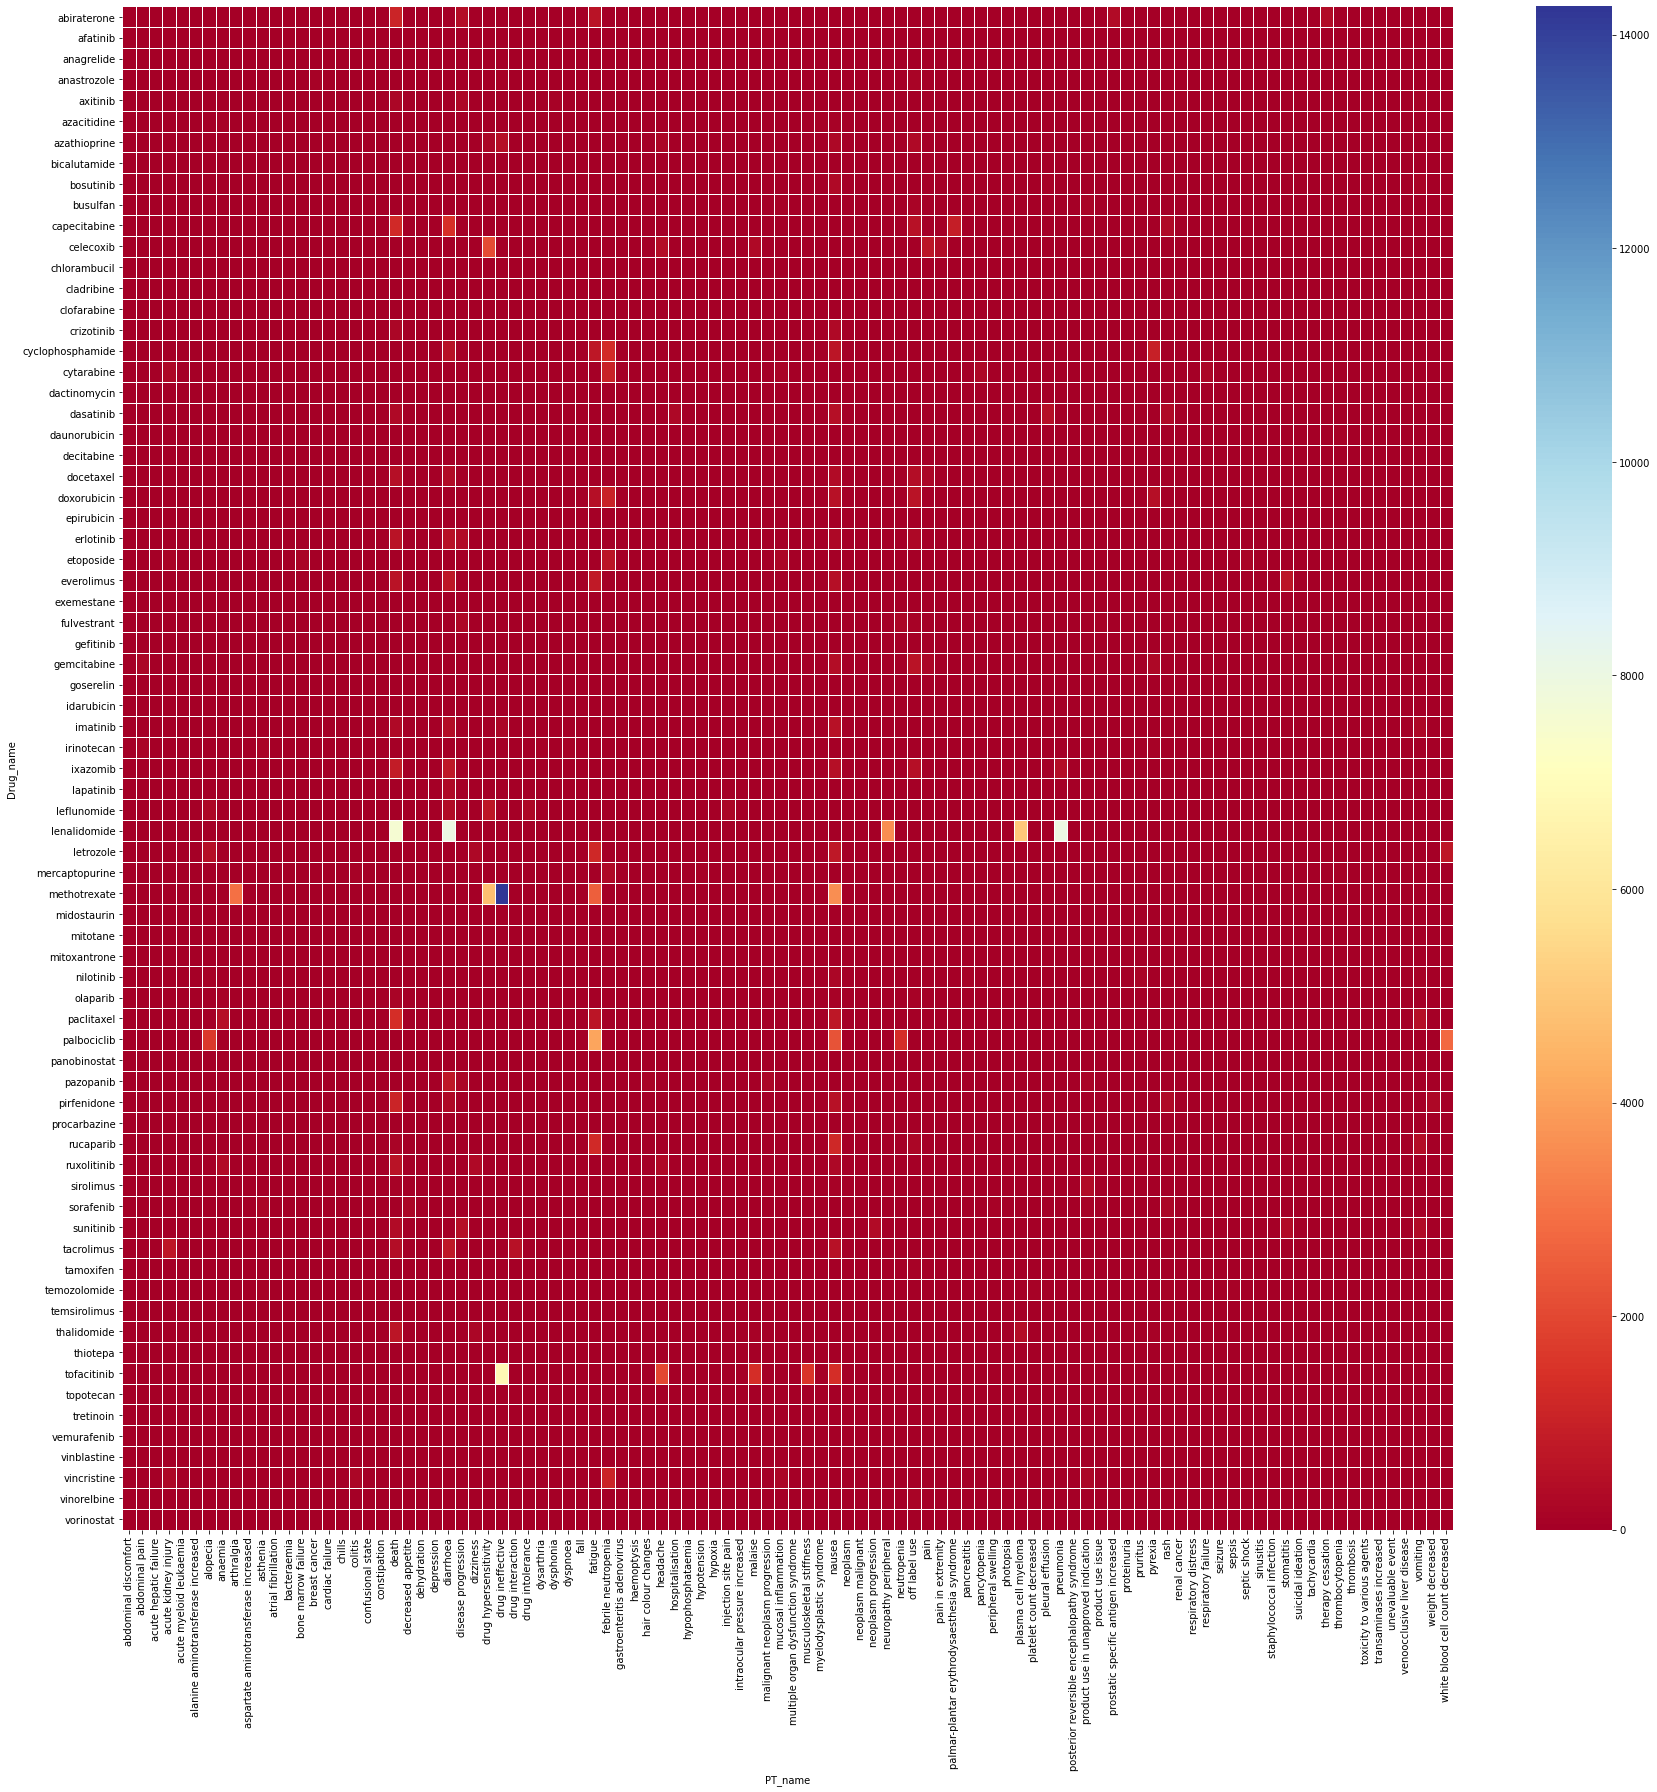

In [114]:
#cmap = plt.get_cmap('RdYlBu', 3)
fig, ax = plt.subplots(figsize=(25, 25))
ax = sns.heatmap(group_dis,linewidth=.5,cmap='RdYlBu')#PiYG
#colorbar = ax.collections[0].colorbar
#colorbar.set_ticks([0, 1, 2])
#plt.title('Sex-biased tissues applying Tamoxifen', fontsize = 20) # title with fontsize 20
#plt.xlabel('Tissues', fontsize = 12) # x-axis label with fontsize 15
#plt.ylabel('Signatures', fontsize = 12) # y-axis label with fontsize 15
plt.tight_layout()
#plt.savefig("cell_line_tamoxifen_signatures_results.svg")
plt.show()

In [ ]:
### Female vs Male

In [104]:
 pd.value_counts(net_join_adr["sex_biased_log_oddratio"])

sex_biased_log_oddratio
sex-biased male      178
sex-biased female    149
Name: count, dtype: int64

In [ ]:
## comparar los valores de odds ratio entre hombre y mujer para ver si existen diferencias
## no se si es del todo correcto
